# Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.



In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [150]:
df=pd.read_csv(r'E:\Data Science Certificates\practice project\Big Data Mart Sales Problem\bigdatamart_Train.csv')
df 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [151]:
df.shape

(8523, 12)

In [152]:
# We have total 8523 rows and 12 column where last column item_Outlet_Sales is our target column

In [153]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [154]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [155]:
df.sample(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1583,FDV33,9.60,Regular,0.027344,Snack Foods,257.8304,OUT046,1997,Small,Tier 1,Supermarket Type1,1808.3128
3554,FDI45,13.10,Low Fat,0.037640,Fruits and Vegetables,175.6054,OUT049,1999,Medium,Tier 1,Supermarket Type1,1050.6324
5361,FDY33,14.50,Regular,0.097352,Snack Foods,160.7262,OUT049,1999,Medium,Tier 1,Supermarket Type1,1750.3882
6321,FDY07,11.80,Low Fat,0.121501,Fruits and Vegetables,46.8402,OUT013,1987,High,Tier 3,Supermarket Type1,413.4618
3083,FDJ15,11.35,Regular,0.023318,Dairy,182.4608,OUT035,2004,Small,Tier 2,Supermarket Type1,7534.1928
5902,NCJ29,10.60,Low Fat,0.035336,Health and Hygiene,87.0224,OUT018,2009,Medium,Tier 3,Supermarket Type2,1193.1136


In [156]:
# Just checking above random sample to have more review of data

In [157]:

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

So here we can see Null values are present in data set in column Iteam weight and Size.

In [158]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We Have so many columns are present with object so we will have to use encoding for them to convert

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [160]:
count = df.nunique()
count

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

We can see Item_visibility has highest Unique value and Otlet_size and Outlet location type has lowest unique values.

<AxesSubplot:>

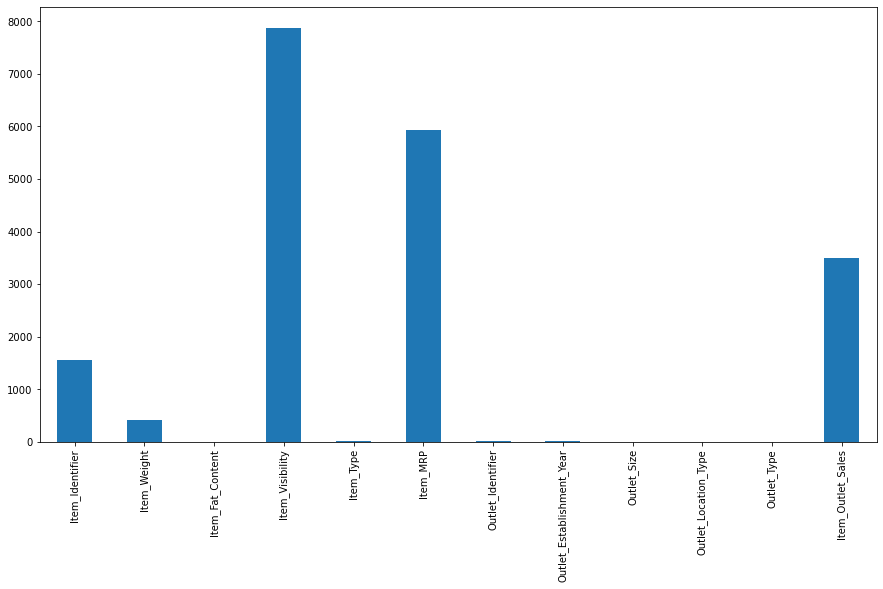

In [161]:
count = df.nunique()

plt.figure(figsize=(15,8))
count.plot(kind='bar')

We can see uniquesness on above graph

In [162]:
Missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)
Missing_percentage[:12]

Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Outlet_Sales            0.000000
Outlet_Type                  0.000000
Outlet_Location_Type         0.000000
Outlet_Establishment_Year    0.000000
Outlet_Identifier            0.000000
Item_MRP                     0.000000
Item_Type                    0.000000
Item_Visibility              0.000000
Item_Fat_Content             0.000000
Item_Identifier              0.000000
dtype: float64

Outlet_size has highest missing data

In [163]:
df.drop("Item_Identifier",axis=1,inplace=True)
df.drop("Outlet_Identifier",axis=1,inplace=True)
df.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [164]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [165]:
df.shape

(8523, 9)

So we have dropped column as decided

In [166]:
#We will treat now Null values

#Since Item_Weight has a numerical data  we can fill null value with mean

df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())


In [167]:
# Outlet_Size is catagorical data hence we will go with mode

df["Outlet_Size"] =df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [168]:
# Let's check the missing value after filling it up
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

So there is not missing value present now

In [169]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [170]:
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Fat_Content'].unique()

array([1, 2, 3, 0, 4])

In [171]:
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Size'].unique()

array([1, 0, 2])

In [172]:
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [173]:
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [174]:
df.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
dtype: object

Finally all columns are converted now in to required format.

# Lets do some EDA now

In [175]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

Text(0.5, 1.0, 'Item_Fat_Content')

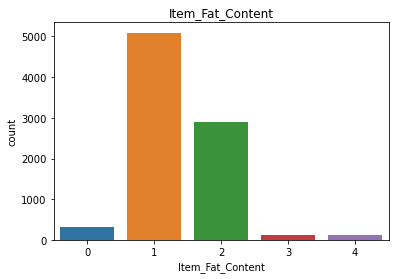

In [176]:
sns.countplot(df["Item_Fat_Content"])
plt.title("Item_Fat_Content")

Text(0.5, 1.0, 'Outlet_Type')

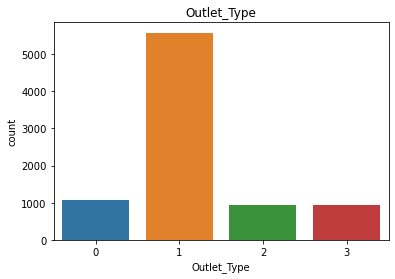

In [177]:
sns.countplot(df["Outlet_Type"])
plt.title("Outlet_Type")

Just looking at the data available in Otlet type so we have highest count of 1

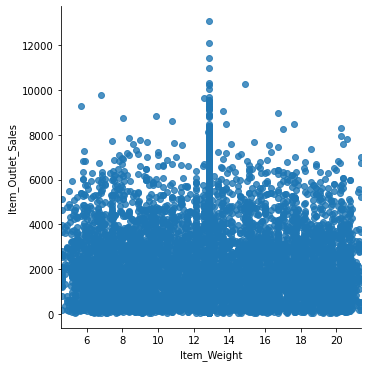

In [178]:
sns.lmplot(x="Item_Weight", y="Item_Outlet_Sales", data=df)

Above looks like no positve or negative relation. it is constant for all weights

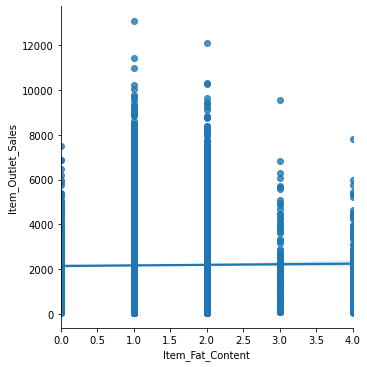

In [179]:
sns.lmplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=df)

We can observe above plot that lower the fat higher selling that mean consumers are more health consious and they dont prefer for fat in food

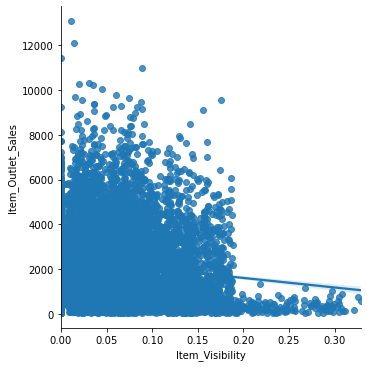

In [180]:
sns.lmplot(x="Item_Visibility", y="Item_Outlet_Sales", data=df)

Some kind of positivity till 0.20 visiblity

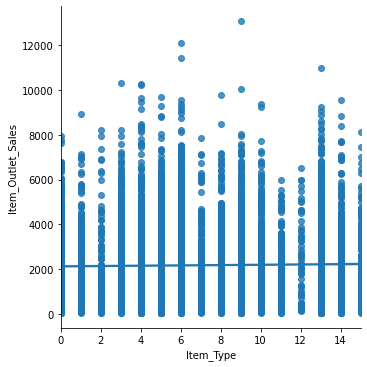

In [181]:
sns.lmplot(x="Item_Type", y="Item_Outlet_Sales", data=df)

Sale is normal for all type of item

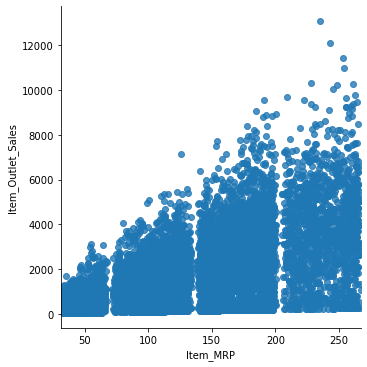

In [182]:
sns.lmplot(x="Item_MRP", y="Item_Outlet_Sales", data=df)

So Here we can see postive relation more the price more sales

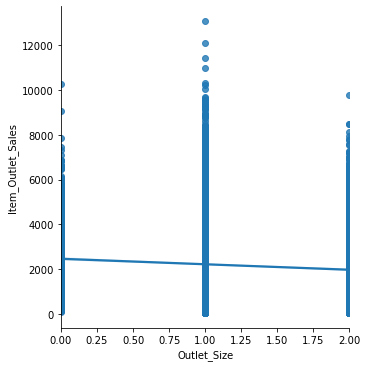

In [183]:
sns.lmplot(x="Outlet_Size", y="Item_Outlet_Sales", data=df)

Outlet size 1 has highest sales

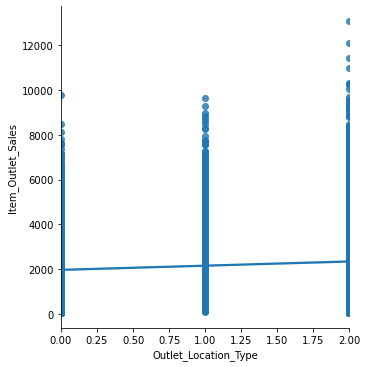

In [184]:
sns.lmplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df)

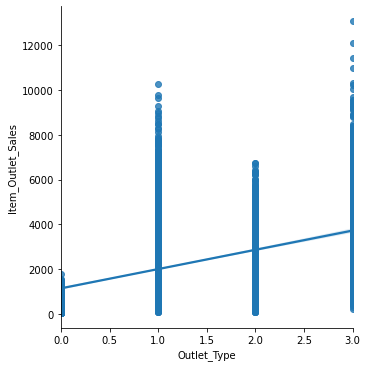

In [185]:
sns.lmplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)

Last some charts does not have impactable data

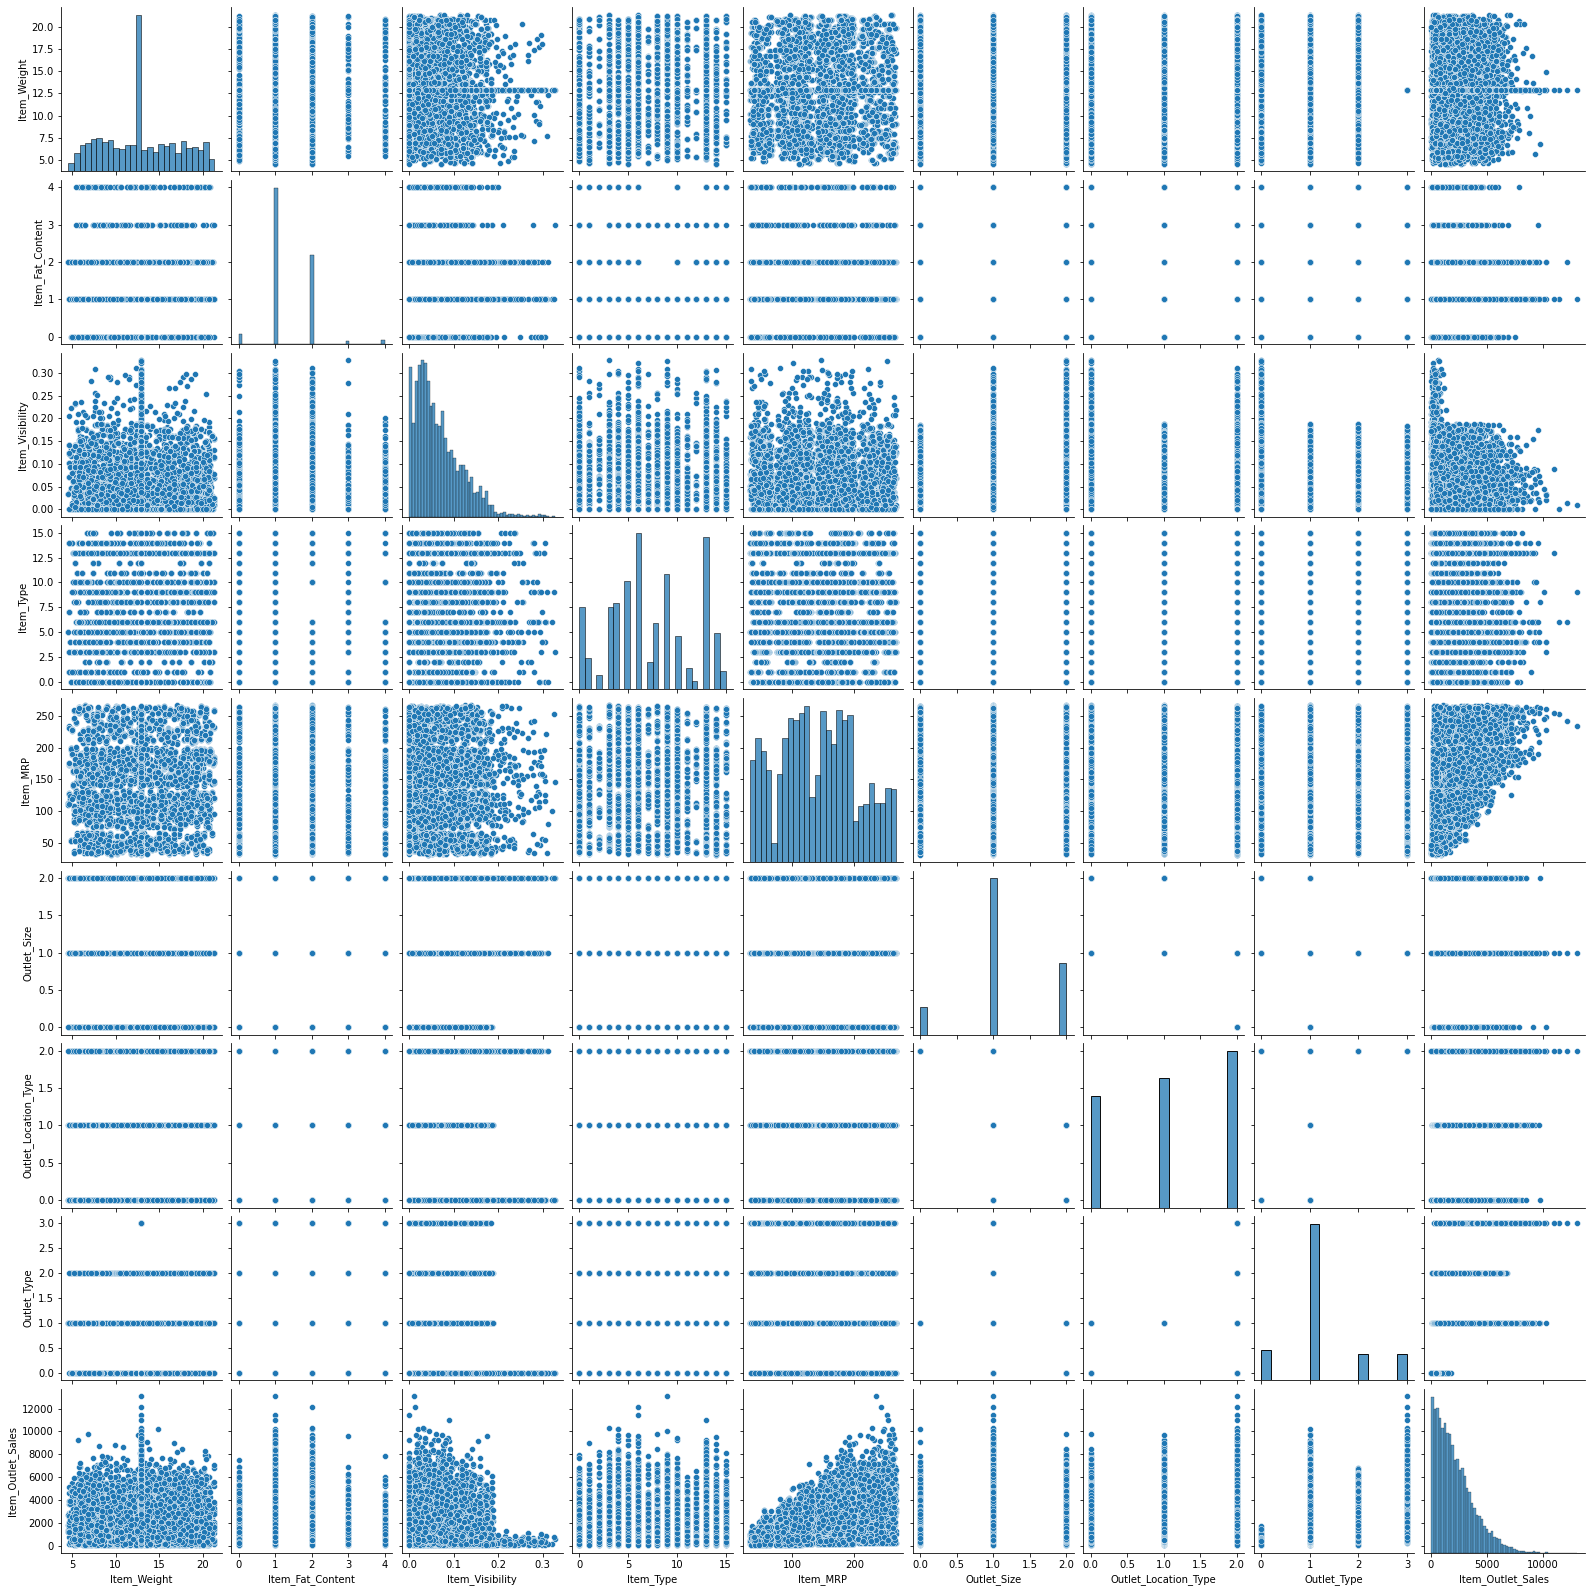

In [186]:
sns.pairplot(df)

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Fat_Content,8523.0,1.369354,0.644810,0.000,1.000000,1.000000,2.000000,4.000000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_Type,8523.0,7.226681,4.209990,0.000,4.000000,6.000000,10.000000,15.000000
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Size,8523.0,1.170832,0.600327,0.000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type,8523.0,1.112871,0.812757,0.000,0.000000,1.000000,2.000000,2.000000
Outlet_Type,8523.0,1.201220,0.796459,0.000,1.000000,1.000000,1.000000,3.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


From above we can see that there are chances of outliers in sales but as it is our target variable we can understand
Item type has good distribution 

Lets see now some correlation

In [188]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.012049,0.034042,1.000000,-0.035249,-0.001315,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.115958,-0.035249,1.000000,0.032651,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.006059,0.000232,-0.001975,0.567574
Outlet_Size,-0.007225,-0.012058,0.069309,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,-0.173468,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.009800,-0.128625,0.017048,0.567574,-0.086182,0.089367,0.401522,1.000000


<AxesSubplot:>

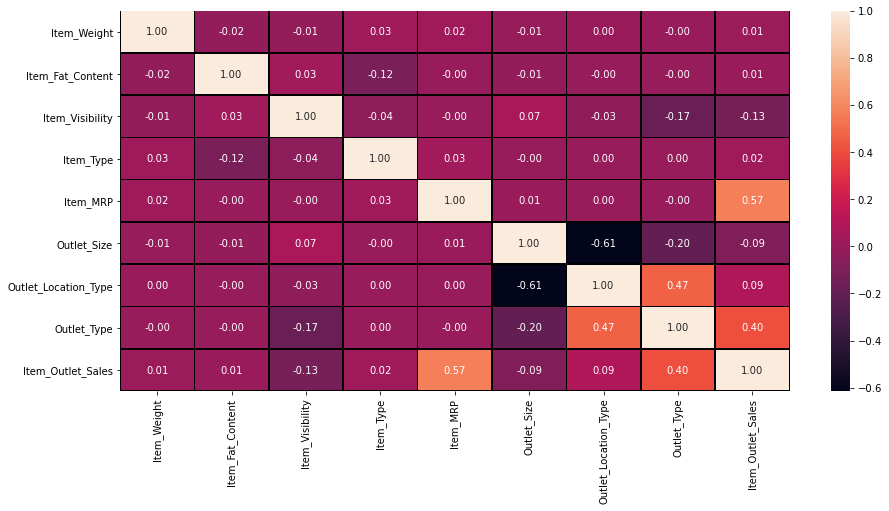

In [189]:
# we will plot all aboev values on hitmap just for good visualisation

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

Above we can see Item_visiblity has high nigative correlation and MRP has high positive correlation

In [190]:
#for it important to see correlation of all columns with our target variable.

In [191]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility        -0.128625
Outlet_Size            -0.086182
Item_Fat_Content        0.009800
Item_Weight             0.011550
Item_Type               0.017048
Outlet_Location_Type    0.089367
Outlet_Type             0.401522
Item_MRP                0.567574
Item_Outlet_Sales       1.000000
Name: Item_Outlet_Sales, dtype: float64

# Now we will check if outliers are present in data or not

<function matplotlib.pyplot.show(close=None, block=None)>

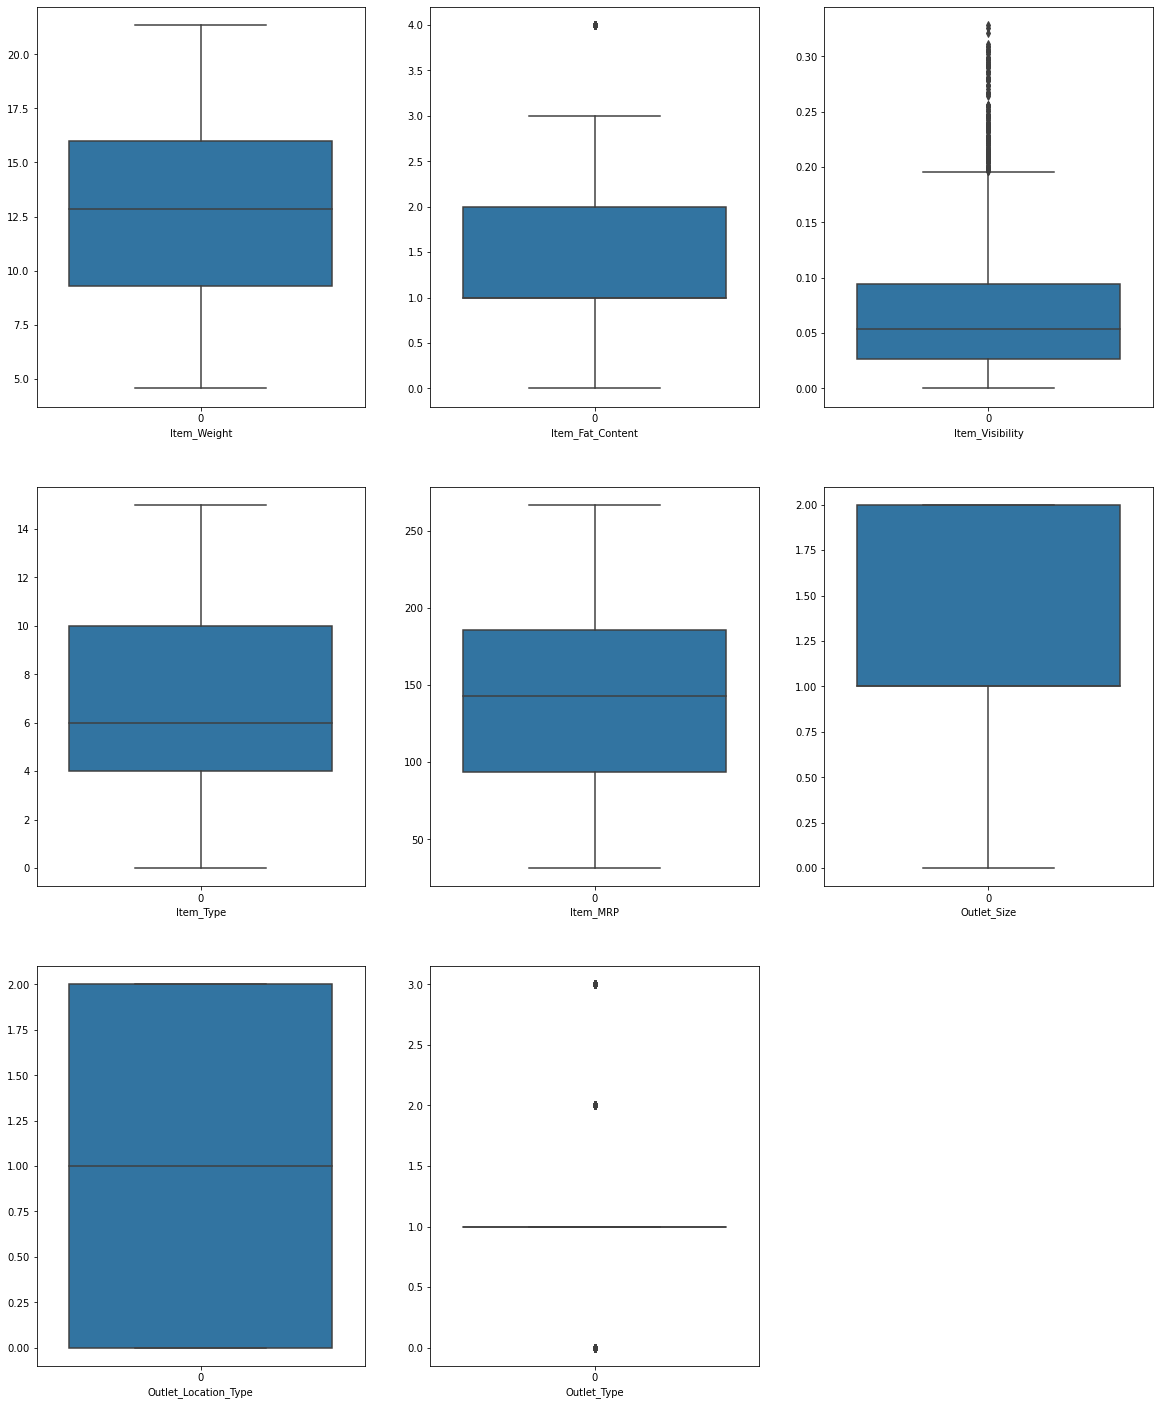

In [192]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=8:
        plt.subplot(3,3,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show
    

We can see item_visiblity,fat_content, and Outlet type has outliers

Lets remove outliers

In [193]:
from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]

In [194]:
z.shape

(8222, 9)

In [195]:
df.shape

(8523, 9)

In [196]:
loss=(8523-8222)/8523*100
loss

3.5316203214830457

In [197]:
# 3% loss we can accept

In [198]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,
            ...
            8201, 8215, 8233, 8245, 8273, 8345, 8387, 8432, 8447, 8517],
           dtype='int64', length=301)

In [199]:
df.drop(dropindex,inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976


<function matplotlib.pyplot.show(close=None, block=None)>

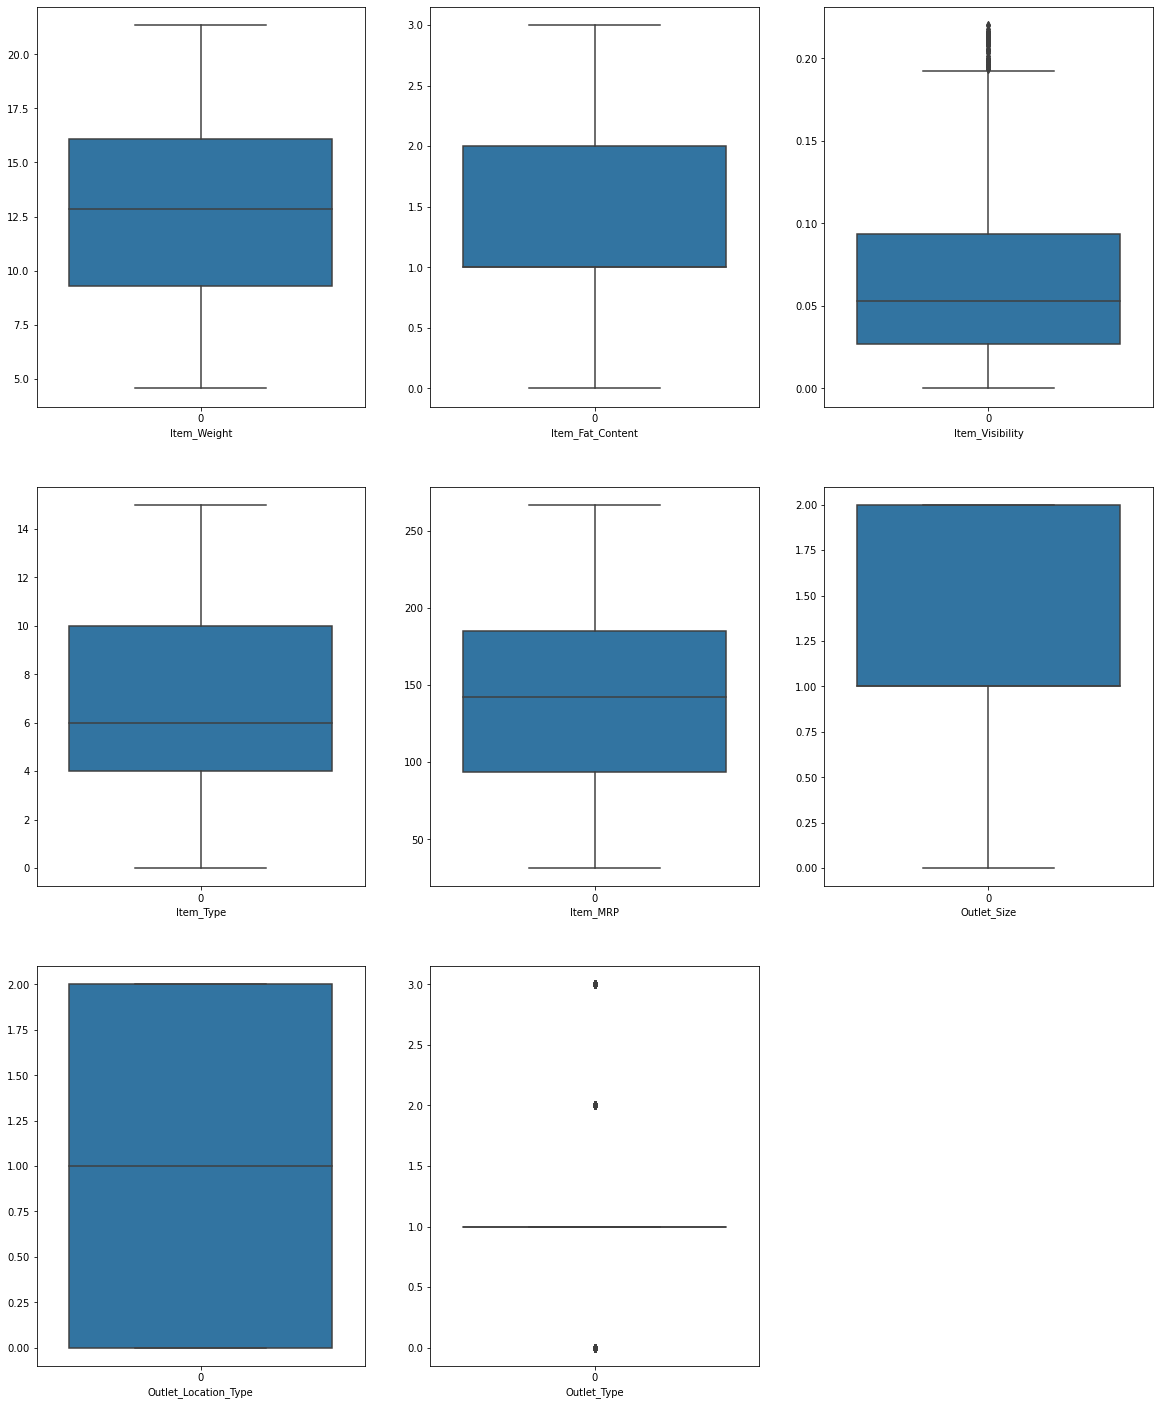

In [200]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=8:
        plt.subplot(3,3,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

We tried to remove as much as possible now we can go ahead with this data

# We will check skewness of data now

In [201]:
df.skew()

Item_Weight             0.087821
Item_Fat_Content        0.291106
Item_Visibility         0.794506
Item_Type               0.094578
Item_MRP                0.139153
Outlet_Size            -0.089519
Outlet_Location_Type   -0.202794
Outlet_Type             0.957163
Item_Outlet_Sales       0.877476
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

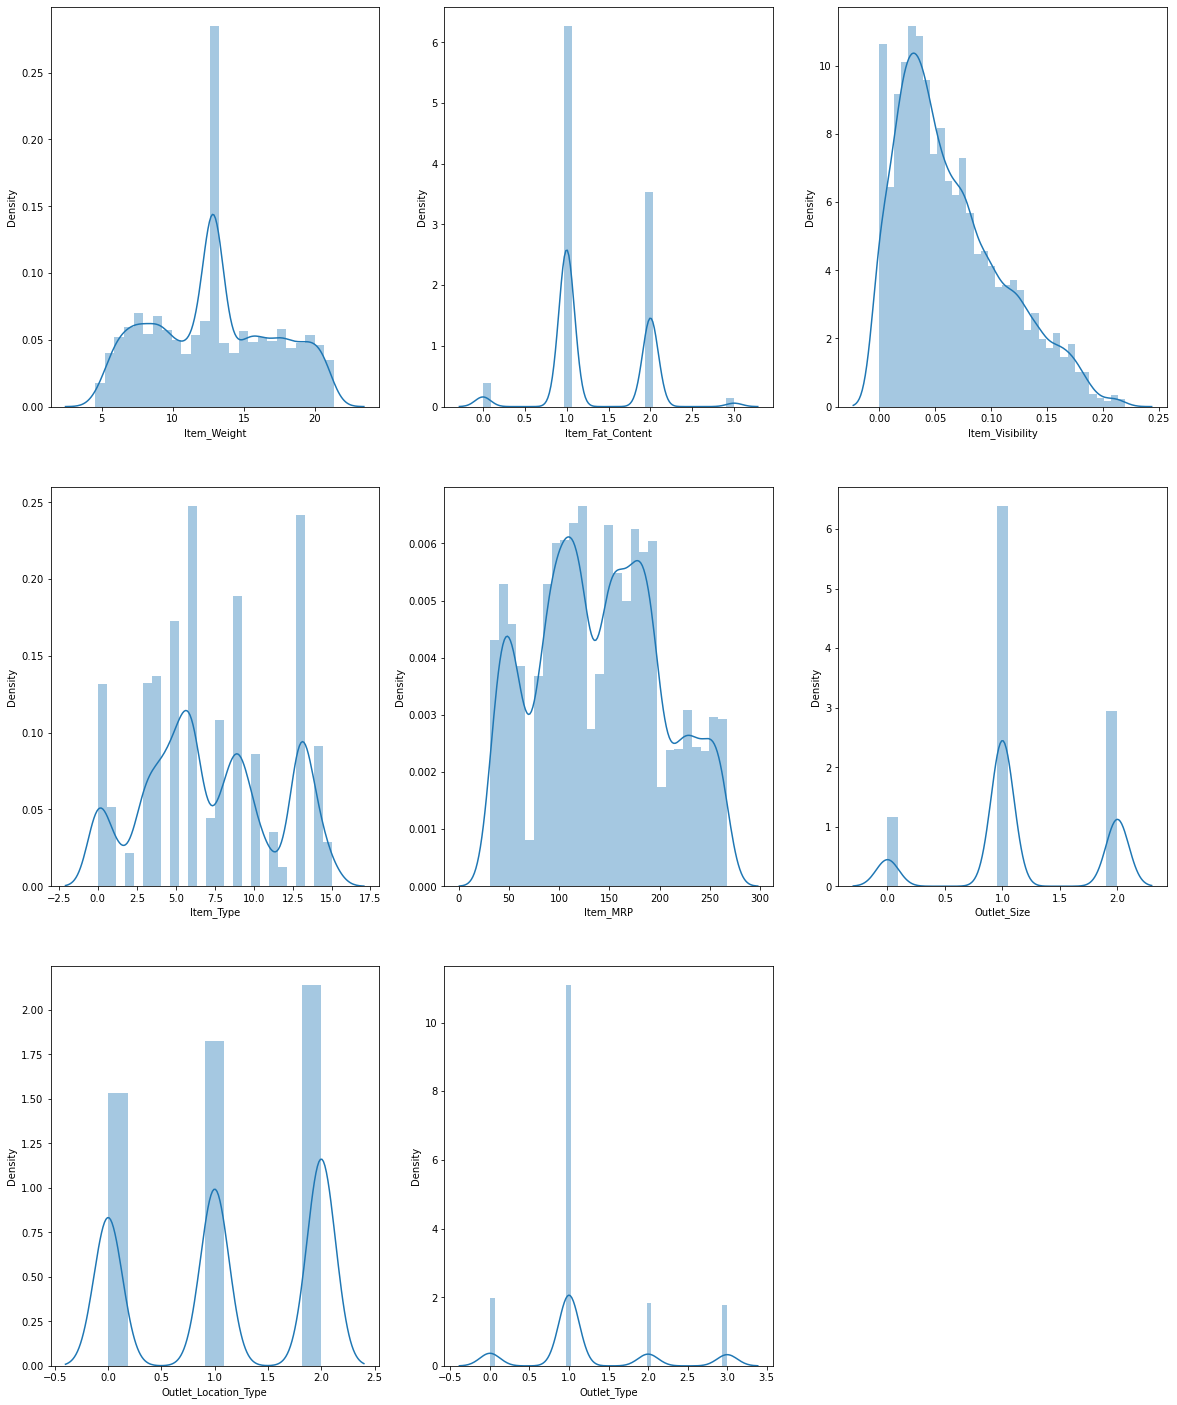

In [202]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=8:
        plt.subplot(3,3,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

We have skewness in Item_visiblity and outlet_type which we need to handle

In [203]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976


In [204]:
x=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

x.shape

(8222, 8)

In [205]:
y.shape

(8222,)

In [206]:
x.shape[1]

8

Lets treat skewness now as have seen there was skewness present in data set

In [207]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.81766492, -0.55319135, -1.1399084 , ..., -0.28893369,
        -1.37620889, -0.13508106],
       [-1.72429667,  1.1617017 , -1.03076718, ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [ 1.07935446, -0.55319135, -1.11556042, ..., -0.28893369,
        -1.37620889, -0.13508106],
       ...,
       [-0.49341755, -0.55319135, -0.53658307, ...,  1.39061522,
        -0.1266511 , -0.13508106],
       [-1.36561856,  1.1617017 ,  1.5353834 , ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [ 0.48880913, -0.55319135, -0.26756366, ...,  1.39061522,
        -1.37620889, -0.13508106]])

In [208]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [209]:
Columnsname=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

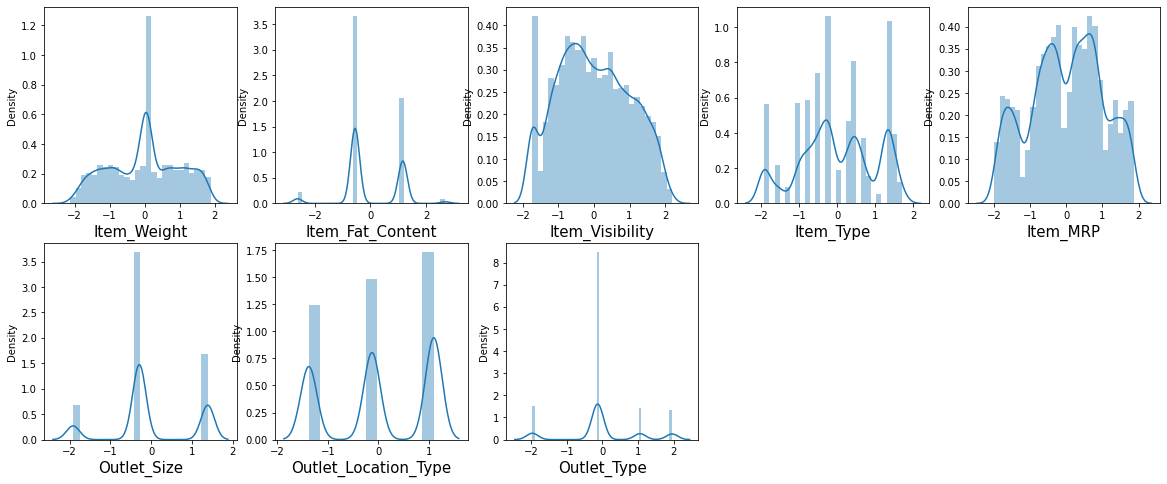

In [210]:
new_x=pd.DataFrame(data=x,columns=Columnsname)

plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in new_x:
    if plotn<=8:
        plt.subplot(5,5,plotn)
        sns.distplot(new_x[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show() 

Now our data in in symnetirc shape so that we can procced further

# We will check and remove multicolinarity now with VIF

In [211]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
df1=pd.DataFrame(data=df)

df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976


In [213]:
x1=df1.iloc[:,:-1]
y1=df1.iloc[:,-1]


In [214]:
x1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,1,0,1
1,5.920,2,0.019278,14,48.2692,1,2,2
2,17.500,1,0.016760,10,141.6180,1,0,1
3,19.200,2,0.000000,6,182.0950,1,2,0
4,8.930,1,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1
8519,8.380,2,0.046982,0,108.1570,1,1,1
8520,10.600,1,0.035186,8,85.1224,2,1,1
8521,7.210,2,0.145221,13,103.1332,1,2,2


In [215]:
x1.shape[1]

8

In [216]:
def cal_vif(i):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["vif factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [217]:
x1.shape

(8222, 8)

In [218]:
cal_vif(x1)

,variables,vif factor
0,Item_Weight,7.933516
1,Item_Fat_Content,5.499825
2,Item_Visibility,2.767640
3,Item_Type,3.669294
4,Item_MRP,5.461008
5,Outlet_Size,5.635353
6,Outlet_Location_Type,4.881998
7,Outlet_Type,4.406241


I see that Item_weight is having almost 8 vif point and I went back to heat map and  iteam weight is not contributing much in Y. so I will drop Item_weight. we can also see that outlet_Location_type and Outlet_type also have same Vif but we should not drop them becaseu they are having same vif due to we have encoded them and they all have same values as 2,1,0

In [219]:
x1=df1.drop(["Item_Weight"],axis=1)

In [220]:
x=x1

In [221]:
x

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,0.016047,4,249.8092,1,0,1,3735.1380
1,2,0.019278,14,48.2692,1,2,2,443.4228
2,1,0.016760,10,141.6180,1,0,1,2097.2700
3,2,0.000000,6,182.0950,1,2,0,732.3800
4,1,0.000000,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,1,0.056783,13,214.5218,0,2,1,2778.3834
8519,2,0.046982,0,108.1570,1,1,1,549.2850
8520,1,0.035186,8,85.1224,2,1,1,1193.1136
8521,2,0.145221,13,103.1332,1,2,2,1845.5976


In [222]:
x=x.iloc[:,:-1]

In [223]:
x

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,0.016047,4,249.8092,1,0,1
1,2,0.019278,14,48.2692,1,2,2
2,1,0.016760,10,141.6180,1,0,1
3,2,0.000000,6,182.0950,1,2,0
4,1,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...
8518,1,0.056783,13,214.5218,0,2,1
8519,2,0.046982,0,108.1570,1,1,1
8520,1,0.035186,8,85.1224,2,1,1
8521,2,0.145221,13,103.1332,1,2,2


In [224]:
x

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,0.016047,4,249.8092,1,0,1
1,2,0.019278,14,48.2692,1,2,2
2,1,0.016760,10,141.6180,1,0,1
3,2,0.000000,6,182.0950,1,2,0
4,1,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...
8518,1,0.056783,13,214.5218,0,2,1
8519,2,0.046982,0,108.1570,1,1,1
8520,1,0.035186,8,85.1224,2,1,1
8521,2,0.145221,13,103.1332,1,2,2


In [225]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.55319135, -1.1399084 , -0.71621389, ..., -0.28893369,
        -1.37620889, -0.13508106],
       [ 1.1617017 , -1.03076718,  1.50858306, ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.55319135, -1.11556042,  0.6840025 , ..., -0.28893369,
        -1.37620889, -0.13508106],
       ...,
       [-0.55319135, -0.53658307,  0.24491587, ...,  1.39061522,
        -0.1266511 , -0.13508106],
       [ 1.1617017 ,  1.5353834 ,  1.30805716, ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.55319135, -0.26756366,  1.50858306, ...,  1.39061522,
        -1.37620889, -0.13508106]])

In [226]:
x.shape

(8222, 7)

In [227]:
y.shape

(8222,)

In [228]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.55319135, -1.1399084 , -0.71621389, ..., -0.28893369,
        -1.37620889, -0.13508106],
       [ 1.1617017 , -1.03076718,  1.50858306, ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.55319135, -1.11556042,  0.6840025 , ..., -0.28893369,
        -1.37620889, -0.13508106],
       ...,
       [-0.55319135, -0.53658307,  0.24491587, ...,  1.39061522,
        -0.1266511 , -0.13508106],
       [ 1.1617017 ,  1.5353834 ,  1.30805716, ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.55319135, -0.26756366,  1.50858306, ...,  1.39061522,
        -1.37620889, -0.13508106]])

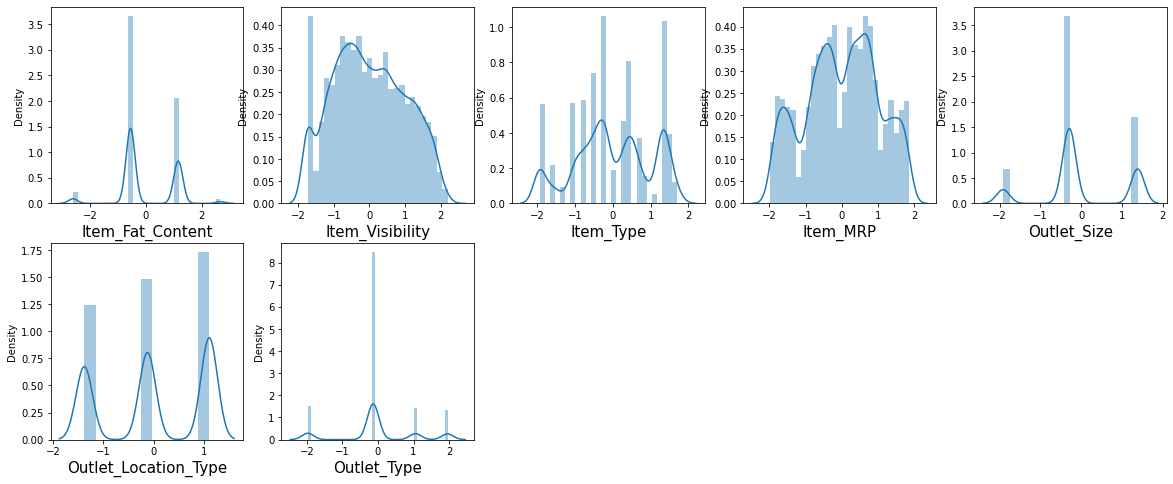

In [229]:

col1=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']

new_x=pd.DataFrame(data=x,columns=col1)

plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in new_x:
    if plotn<=7:
        plt.subplot(5,5,plotn)
        sns.distplot(new_x[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show() 

Checking skeness after removing it

# Now our data is clean and ready to train multiple nmodels

In [230]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Finding best random state

In [231]:
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.596438664890474 on Random State: 6


We found out best random state which is 6 where we are getting almost 59% accuracy score.

Lets go further to test multiple module to find out best one

In [234]:
dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
adb=AdaBoostRegressor()
gdb=GradientBoostingRegressor()
lnr=LinearRegression()
rfr=RandomForestRegressor()
sv=SVR()

model=[dt,kn,adb,gdb,lnr,rfr,sv]

for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=6)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("RMSE Score is:",mean_squared_error(y_test,predi))
    r2 = r2_score(y_test, predi)*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(i, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    print("*****************************************************************")

performance matrix of DecisionTreeRegressor() is:
RMSE Score is: 1929884.8014239338
R2 Score is: 23.86183568671537
Cross Validation Score: 15.40345189494991
R2 Score - Cross Validation Score is 8.45838379176546
*****************************************************************
performance matrix of KNeighborsRegressor() is:
RMSE Score is: 1137357.2513619976
R2 Score is: 55.128775964652455
Cross Validation Score: 50.68258187278817
R2 Score - Cross Validation Score is 4.446194091864285
*****************************************************************
performance matrix of AdaBoostRegressor() is:
RMSE Score is: 994043.6307027685
R2 Score is: 60.78281085317697
Cross Validation Score: 55.32899674378074
R2 Score - Cross Validation Score is 5.453814109396227
*****************************************************************
performance matrix of GradientBoostingRegressor() is:
RMSE Score is: 929204.0541278311
R2 Score is: 63.34087355807203
Cross Validation Score: 58.21181187092475
R2 Score - Cr

As compare to others I see that GradientBoostingRegressor is working weell with low cross validatio score so we can tune further this model to increase accuracy

In [235]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform

grid_params = { "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
               "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
              "learning_rate": loguniform(0.01, 1)}




In [242]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

grid_params= {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750],'max_depth':[4,6,8]}




In [244]:
gs = GridSearchCV(GradientBoostingRegressor(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [245]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 11.5min finished


In [246]:
g_res.best_score_

0.5718510988085098

In [247]:
gs.best_params_

{'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 750}

I can see that after tunning accuracy is getting low then I will got with deafual paramenter for GradientBoostingRegressor

In [256]:
dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
adb=AdaBoostRegressor()
gdb=GradientBoostingRegressor()
lnr=LinearRegression()
rfr=RandomForestRegressor()
sv=SVR()

model=[gdb]

for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=6)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("RMSE Score is:",mean_squared_error(y_test,predi))
    r2 = r2_score(y_test, predi)*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(i, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    print("*****************************************************************")

performance matrix of GradientBoostingRegressor() is:
RMSE Score is: 930006.544655846
R2 Score is: 63.30921355658554
Cross Validation Score: 58.203355644366574
R2 Score - Cross Validation Score is 5.105857912218966
*****************************************************************


In [258]:
import joblib
filename = "Big data.pkl"
joblib.dump(gdb, filename)

['Big data.pkl']

Lets prepare now test file to predict with fresh value

In [284]:
df4=pd.read_csv(r'E:\Data Science Certificates\practice project\Big Data Mart Sales Problem\bigdatamart_Test.csv')
df4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [285]:
df4.drop(['Item_Identifier','Item_Weight','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [286]:
df4

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,reg,0.038428,Dairy,87.3198,NaN,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,NaN,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,NaN,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...
5676,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1
5677,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2
5678,Low Fat,0.073529,Health and Hygiene,118.7440,NaN,Tier 2,Supermarket Type1
5679,Regular,0.000000,Canned,214.6218,NaN,Tier 2,Supermarket Type1


In [287]:
df4.dtypes

Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
dtype: object

In [295]:
# Outlet_Size is catagorical data hence we will go with mode

df4["Outlet_Size"] =df4["Outlet_Size"].fillna(df4["Outlet_Size"].mode()[0])

In [296]:
df4.isnull().sum()

Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [306]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

df4['Item_Fat_Content']=encoder.fit_transform(df4['Item_Type'])
df4['Item_Fat_Content'].unique()

array([13,  4, 11,  6,  0,  8,  1,  7, 12, 14,  9,  5, 10,  3, 15,  2])

In [308]:
df4['Item_Type']=encoder.fit_transform(df4['Item_Type'])
df4['Item_Type'].unique()

array([13,  4, 11,  6,  0,  8,  1,  7, 12, 14,  9,  5, 10,  3, 15,  2])

In [309]:
df4['Outlet_Size']=encoder.fit_transform(df4['Outlet_Size'])
df4['Outlet_Size'].unique()

array([1, 2, 0])

In [310]:
df4['Outlet_Location_Type']=encoder.fit_transform(df4['Outlet_Location_Type'])
df4['Outlet_Location_Type'].unique()

array([0, 1, 2])

In [311]:
df4['Outlet_Type']=encoder.fit_transform(df4['Outlet_Type'])
df4['Outlet_Type'].unique()

array([1, 0, 3, 2])

In [312]:
df4.dtypes

Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
dtype: object

In [314]:
df4

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,13,0.007565,13,107.8622,1,0,1
1,4,0.038428,4,87.3198,1,1,1
2,11,0.099575,11,241.7538,1,2,0
3,13,0.015388,13,155.0340,1,1,1
4,4,0.118599,4,234.2300,1,2,3
...,...,...,...,...,...,...,...
5676,13,0.013496,13,141.3154,2,0,1
5677,15,0.142991,15,169.1448,1,2,2
5678,8,0.073529,8,118.7440,1,1,1
5679,3,0.000000,3,214.6218,1,1,1


In [323]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df4)
x

array([[ 1.36691643, -1.13407715,  1.36691643, ..., -0.28473712,
        -1.369215  , -0.25276858],
       [-0.76644957, -0.53185019, -0.76644957, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.89283509,  0.6613164 ,  0.89283509, ..., -0.28473712,
         1.0915602 , -1.50799439],
       ...,
       [ 0.1817131 ,  0.15307374,  0.1817131 , ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [-1.00349023, -1.28168987, -1.00349023, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [-1.00349023,  0.76171558, -1.00349023, ..., -0.28473712,
        -0.1388274 , -0.25276858]])

In [324]:
model = joblib.load("Big data.pkl")
print(model.predict(x))

[1693.44800318 1316.55753427  945.99489845 ... 1878.90721294 3430.15963893
 1362.91861007]


In [327]:
model = joblib.load("Big data.pkl")

Col=["Sales"]

df5=pd.DataFrame(data=(model.predict(x)),columns=Col)

In [328]:
df5

,Sales
0,1693.448003
1,1316.557534
2,945.994898
3,2506.004538
4,5016.655683
...,...
5676,2178.710322
5677,2352.902761
5678,1878.907213
5679,3430.159639


In [ ]:
We have succesfully predicated fresh data now